## Loading the csv file and making some changes and verifications

In [19]:
import pandas as pd

In [20]:
# load the dataset mushroom, where the objective is predict whether a mushroom is poisonous or not ("class" column)
dataset = pd.read_csv('./dataset/mushroom_cleaned.csv')
dataset

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


In [21]:
# change the name "class" to "poisonous"
dataset.rename(columns={'class':'poisonous'}, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   poisonous        54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [22]:
### TO - DO
# Fazer uns gráficos mostrando como os valores de cada parâmetro se distribui
# Se for possível fazer esses valores em relação a ser ou não venenoso

In [23]:
# see if there are any null values
dataset.isnull().sum(axis=0)

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
poisonous          0
dtype: int64

## Making the tests and predictions

In [24]:
from sklearn.model_selection import train_test_split
import graphviz

In [25]:
labels = dataset.poisonous
dataframe = dataset.drop('poisonous',inplace=False, axis=1)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
0,1372,2,2,10,3.807467,1545,11,1.804273
1,1461,2,2,10,3.807467,1557,11,1.804273
2,1371,2,2,10,3.612496,1566,11,1.804273
3,1261,6,2,10,3.787572,1566,11,1.804273
4,1305,6,2,10,3.711971,1464,11,0.943195
...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195
54031,82,2,3,2,1.186164,490,12,0.943195
54032,82,5,3,2,0.915593,584,12,0.888450
54033,79,2,3,2,1.034963,491,12,0.888450


In [26]:
# separating the data in 2 groups (training and testing), the test group will have 10% of the data
train, test, res_train, res_test = train_test_split(dataframe, labels, test_size=0.99)

In [ ]:
algorithm = ['Decision Tree', 'K-Nearest Neighbors (KNN)', 'Regressçao Logistica', 'Random Forest', 'Support Vector Machine (SVM)']
predict_values = []
predict_probabilities = []

### Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [28]:
# Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. 
# In short, this value will reduce the tree, but the probabilities will change
tree = DecisionTreeClassifier(ccp_alpha=0.001)
tree.fit(train, res_train)

DecisionTreeClassifier(ccp_alpha=0.001)

In [29]:
# plotar a arvore de decisão em pdf para melhor visualização
labels_name = ['0', '1']
graph_date = export_graphviz(tree, feature_names=dataframe.columns, class_names=labels_name, filled=True)
graph = graphviz.Source(graph_date.replace(' fillcolor="#399de5"', ' fillcolor="#399de5", shape="diamond"'))
# graph.render('decision_tree')

# interpretação dos nós da arvore
# +-----------------+
# |  atributo <= ?  | # indica qual atribulo foi selecionado por ter maior ganho de informação e a valor que melhor divide o dataset com base nesse atributo (se verdadeiro vai pra esquerda se falso direita)
# |    gini = ?     | # nivel de impureza do atributo com base na classe
# |   samples = ?   | # quantidade de exemplos dos dados de treino utilizado na analise desse nó
# | values = [ ?]?, | # quantidade de exemplos por classe
# |    class = ?    | # qual a classe se a analise parar nesse nó (selecionado com base na classe com maior número de exemplo (classe majoritária))
# +-----------------+

In [30]:
# predicting using the test group (0 or 1)
predict_values.append(neighbors.predict(test))
predict_values[0]

array([1, 1, 0, ..., 0, 1, 0])

In [31]:
# predicting using the test group (0 or 1)
predict_probabilities.append(neighbors.predict_proba(test))
predict_probabilities[0]

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

### K-Nearest Neighbors (KNN)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
neighbors = KNeighborsClassifier()
neighbors.fit(train, res_train)

KNeighborsClassifier()

In [ ]:
# neighbors.get_params()

In [43]:
# predicting using the test group (0 or 1)
predict_values.append(neighbors.predict(test))
predict_values[1]

array([1, 0, 0, ..., 0, 1, 0])

In [44]:
# predicting using the test group (0 or 1)
predict_probabilities.append(neighbors.predict_proba(test))
predict_probabilities[1]

array([[0.4, 0.6],
       [0.8, 0.2],
       [1. , 0. ],
       ...,
       [0.8, 0.2],
       [0.4, 0.6],
       [0.8, 0.2]])

### Regressão Logística

### Random Forest

### Support Vector Machine (SVM)

## Make some differents evalutions

In [45]:
from sklearn.metrics import confusion_matrix

confusion_matrix(res_test, predict_values)

# mostra em forma de matriz, quantos deram (1,1), (1,0) (0,1), (0,0)
# como a precisão é alta, os valores da diagonal principal sao maiores
# (0,0)   (0,1)
# (1,0)   (1,1)
# PODE OLHAR SE TA TENDO MAIS FALSO POSITIVO OU FALSO NEGATIVO

array([[14002, 10111],
       [ 9674, 19708]])

In [46]:
from sklearn.metrics import classification_report

print(classification_report(res_test, predict_values, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.59      0.58      0.59     24113
           1       0.66      0.67      0.67     29382

    accuracy                           0.63     53495
   macro avg       0.63      0.63      0.63     53495
weighted avg       0.63      0.63      0.63     53495



## Making some insights

In [47]:
features_names = dataframe.columns
features_names

Index(['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season'],
      dtype='object')

In [48]:
feature_importance = pd.DataFrame(tree.feature_importances_, index=features_names).sort_values(0, ascending=False)
feature_importance

,0
stem-width,0.222842
stem-height,0.209502
cap-diameter,0.132821
gill-attachment,0.132047
stem-color,0.120981
cap-shape,0.073594
gill-color,0.057985
season,0.050228


<Axes: >

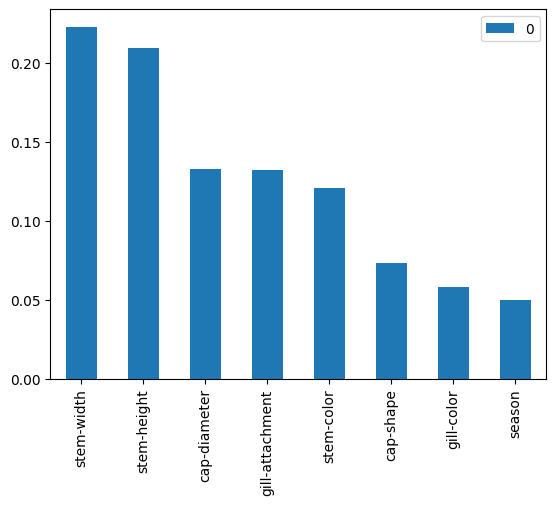

In [49]:
feature_importance.plot(kind='bar')